## Optimization - Model 2
### Reduction of columns

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME','APPLICATION_TYPE', 'CLASSIFICATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'], inplace=True)
application_df.head()

,AFFILIATION,USE_CASE,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL
0,Independent,ProductDev,Association,5000,1
1,Independent,Preservation,Co-operative,108590,1
2,CompanySponsored,ProductDev,Association,5000,0
3,CompanySponsored,Preservation,Trust,6692,1
4,Independent,Heathcare,Trust,142590,1


In [32]:
# Determine the number of unique values in each column.
application_df.nunique()

,0
AFFILIATION,6
USE_CASE,5
ORGANIZATION,4
ASK_AMT,8747
IS_SUCCESSFUL,2


In [33]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AFFILIATION    34299 non-null  object
 1   USE_CASE       34299 non-null  object
 2   ORGANIZATION   34299 non-null  object
 3   ASK_AMT        34299 non-null  int64 
 4   IS_SUCCESSFUL  34299 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [34]:
# Look at ASK_AMT value counts to apply scaling or dummy
ask_amt_types = application_df['ASK_AMT'].value_counts()
ask_amt_types

,count
ASK_AMT,
5000,25398
10478,3
15583,3
63981,3
6725,3
...,...
5371754,1
30060,1
43091152,1


In [35]:
application_df['ASK_AMT'] = pd.qcut(application_df['ASK_AMT'], q=9, duplicates='drop')
ask_amt_types2 = application_df['ASK_AMT'].value_counts()
ask_amt_types2

,count
ASK_AMT,
"(4999.999, 19260.778]",26677
"(19260.778, 151381.111]",3811
"(151381.111, 8597806340.0]",3811


In [36]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
application_df_dummies.head()

,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,"ASK_AMT_(4999.999, 19260.778]","ASK_AMT_(19260.778, 151381.111]","ASK_AMT_(151381.111, 8597806340.0]"
0,1,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
1,1,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
2,0,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
3,1,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False
4,1,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False


In [37]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL'].values
X = application_df_dummies.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
X_train.shape

(25724, 18)

In [39]:
X_test.shape

(8575, 18)

In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  18
hidden_nodes_layer2 = 3

nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              57 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
len(X_train[0])

18

In [43]:
# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Create a callback to save the model's weights every 5 epochs
mc = keras.callbacks.ModelCheckpoint('nn_model2.weights.h5',save_weights_only=True, save_freq=5)

In [45]:
# Train the model
fit_model = nn_model2.fit(X_train_scaled,y_train,epochs=100, callbacks=[mc])

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6640 - loss: 0.6329
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6960 - loss: 0.6003
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6955 - loss: 0.6016
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6983 - loss: 0.5970
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6930 - loss: 0.6025
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6916 - loss: 0.6003
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6895 - loss: 0.6024
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6922 - loss: 0.6011
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6928 - loss: 0.6026
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6998 - loss: 0.5958
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6957 - loss: 0.6015
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.6940 - loss: 0.6022
Loss: 0.6022210717201233, Accuracy: 0.6939941644668579


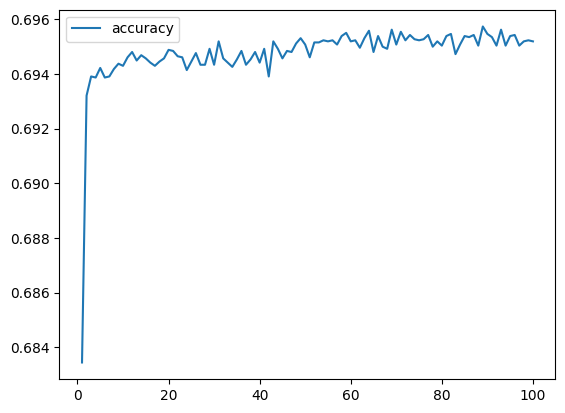

In [47]:
import matplotlib.pyplot as plt

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

## Optimization - Model 3

In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  18
hidden_nodes_layer2 = 3

nn_model3 = tf.keras.models.Sequential()

# First hidden layer
nn_model3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_model3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              57 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model with different learning rate
nn_model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)

In [50]:
# Create a callback to save the model's weights every 5 epochs
mc = keras.callbacks.ModelCheckpoint('nn_model3.weights.h5',save_weights_only=True, save_freq=5)

In [51]:
# Train the model
fit_model = nn_model3.fit(X_train_scaled,y_train,epochs=60, callbacks=[mc])

Epoch 1/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - binary_accuracy: 0.6213 - false_negatives: 2382.0881 - loss: 0.6709
Epoch 2/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - binary_accuracy: 0.6898 - false_negatives: 1659.1776 - loss: 0.6207
Epoch 3/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - binary_accuracy: 0.6962 - false_negatives: 1746.8546 - loss: 0.6109
Epoch 4/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - binary_accuracy: 0.6915 - false_negatives: 1752.3367 - loss: 0.6071
Epoch 5/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.6924 - false_negatives: 1756.5950 - loss: 0.6059
Epoch 6/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - binary_accuracy: 0.6925 - false_negatives: 1792.4572 - loss: 0.6020
Epoch 7/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - binary_accuracy: 0.6925 - false_negatives: 1758.8932 - loss: 0.6019
Epoch 8/60
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.6953 - false_negatives: 1760.1006 - loss: 0.6003
Epoch 9/60
804/804 ━━━━━

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_false_negatives = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, BinaryAccuracy: {model_accuracy}, FalseNegativesAccuracy: {model_false_negatives}")

268/268 - 0s - 1ms/step - binary_accuracy: 0.6947 - false_negatives: 1159.0000 - loss: 0.6008
Loss: 0.6007862091064453, BinaryAccuracy: 0.6946938633918762, FalseNegativesAccuracy: 1159.0


In [54]:
# Export our model to HDF5 file
nn_model3.save("AlphabetSoupCharity3.h5")